In [1]:
import time

In [1]:
import serial

In [2]:
from gdx import gdx

In [3]:
gdx = gdx.gdx()

In [4]:
gdx.open(connection='usb')

Attivo la connessione con il microcontrollore per la gestione di un attuatore (in questo caso uno sgancio magnetico)

In [3]:
def get_serial(port, speed):
    try:
        return serial.Serial(port, speed)
    except:
        return None  

In [4]:
arduino=get_serial('/dev/ttyACM0',115200)

In [5]:
if arduino is None:
    print ('Sistema di sgancio offline!')

Attivo il  magnete

In [6]:
arduino.write('a'.encode())

1

Disattivo il magnete

In [7]:
arduino.write('c'.encode())

1

Visualizzo le informazioni relative alla periferica collegata attualmente

In [5]:
def getDeviceInfo():
    for myinfo in gdx.device_info():
        print(myinfo)

        
    

In [6]:
getDeviceInfo()

GDX-RMS 0L1015V5
Go Direct® Rotary Motion
100
Charging



Visualizzo la lista dei sensori della periferica

In [7]:
def getSensorInfo():
    for myinfo in gdx.sensor_info():
        print(myinfo)

In [8]:
getSensorInfo()

[5, 'Angle', 'rad', [6]]
[6, 'Angle (High Resolution)', 'rad', [5]]


Seleziono uno o più sensori, per selezionarne altri è sufficiente fornire in input una lista con l'indice del sensore es [1,4,7], la variabile column_headers referenzia le unità del sensore scelto

In [9]:
gdx.select_sensors([5])


In [10]:
column_headers = gdx.enabled_sensor_info() 

La funzione getUnits estrae le unità di misura dalla lista delle informazioni dei sensori

In [12]:
def getUnits(info_headers):
    unit_list = []
    units = ''
    for headers in info_headers:
        units = str(headers[headers.find('(') : headers.find(')') +1])
        unit_list.append(units)
    return unit_list

In [13]:
units=getUnits(column_headers)

In [14]:
gdx.start(300)

In [15]:
print(gdx.read())

[0.01745329238474369]


In [16]:
gdx.stop()

In [17]:
import matplotlib.pyplot as plt 

%matplotlib widget
plt.rcParams['animation.html']='jshtml'

In [18]:
def getData(samples,delta_t):
        
        gdx.start(delta_t)
        times=[]
        data=[]
        time=0.0
        
        for i in range(1,samples):
            measurement=gdx.read()
            times.append(time)
            time+=delta_t*0.001
            data.append(measurement[0])
            plt.plot(times,data,'-o',color='gray',markerfacecolor='red')
            fig.canvas.draw()
        gdx.stop()

In [19]:
def getData2(samples,delta_t):
        
        gdx.start(delta_t)
        times=[]
        data=[]
        time=0.0
        
        for i in range(1,samples):
            measurement=gdx.read()
            times.append(time)
            time+=delta_t*0.001
            data.append(measurement[0])
        gdx.stop()
        return times,data

In [20]:
def new_figure(data_units):
    fig=plt.figure(figsize=[10,10])
    plt.grid()
    plt.xlabel('(s)')
    plt.ylabel(data_units[0])
    #plt.rcParams['figure.dpi'] = 150
    return fig

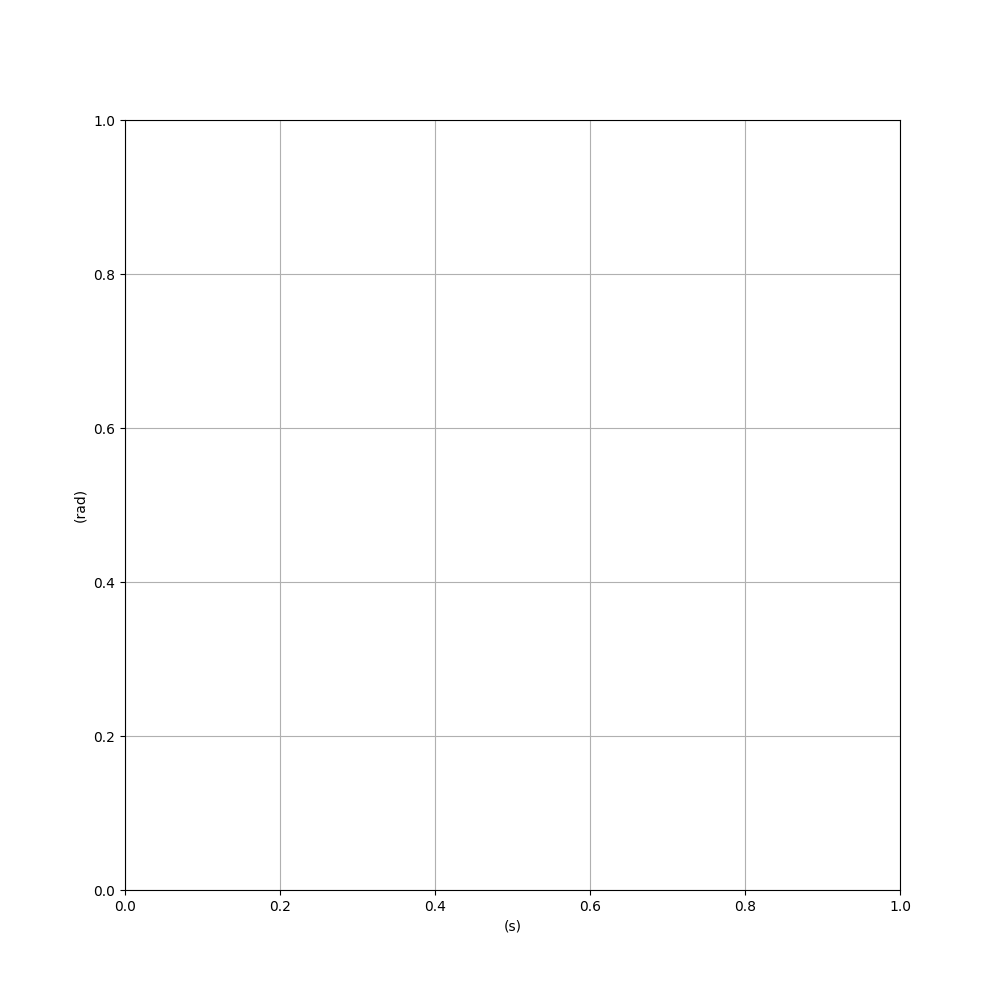

In [21]:
fig=new_figure(units)

In [ ]:
getData(1500,100)

In [27]:
m_times,m_data=getData2(3000,10)

In [36]:
plt.plot(m_times,m_data,'-o',color='gray',markerfacecolor='red')
fig.canvas.draw()